U programskom jeziku Python izvrsiti klasterovanje nad skupom unbalance.csv primenom
algoritama K-sredina, DBSCAN i hijerarhijskog sakupljajuceg klasterovanja za razlicit
broj klastera. Skup unbalance.csv sadrzi numericke atribute X i Y. Rezultate klasterovanja prikazati pomocu seme sa rasprsenim elementima. Za svaki algoritam napraviti i
grak koji prikazuje silueta koecijent za razlicit broj izdvojenih klastera.


In [4]:
import pandas as pd
import sklearn.preprocessing as prep
import sklearn.metrics as met
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("unbalance.csv")

#Provera da li postoje nedostajuce vrednosti u skupu.
#Ukoliko postoje, potrebno ih je obraditi.

df.isna().sum()#.sum()

# print(df.describe)

#normalizacija

x = pd.DataFrame(prep.MinMaxScaler().fit_transform(df), columns = df.columns)


In [59]:
#recnik koji ce sadrzati silueta koeficijent za razlicit broj dobijenih klastera
#pri primeni razlicitih algoritama klasterovanja

sc = {'kmeans' : {'clusters' : [], 'scores' : []},
     'hierar' : {'clusters' : [] , 'scores' : []},
     'dbscan' : {'clusters' : [] , 'scores' : []} }



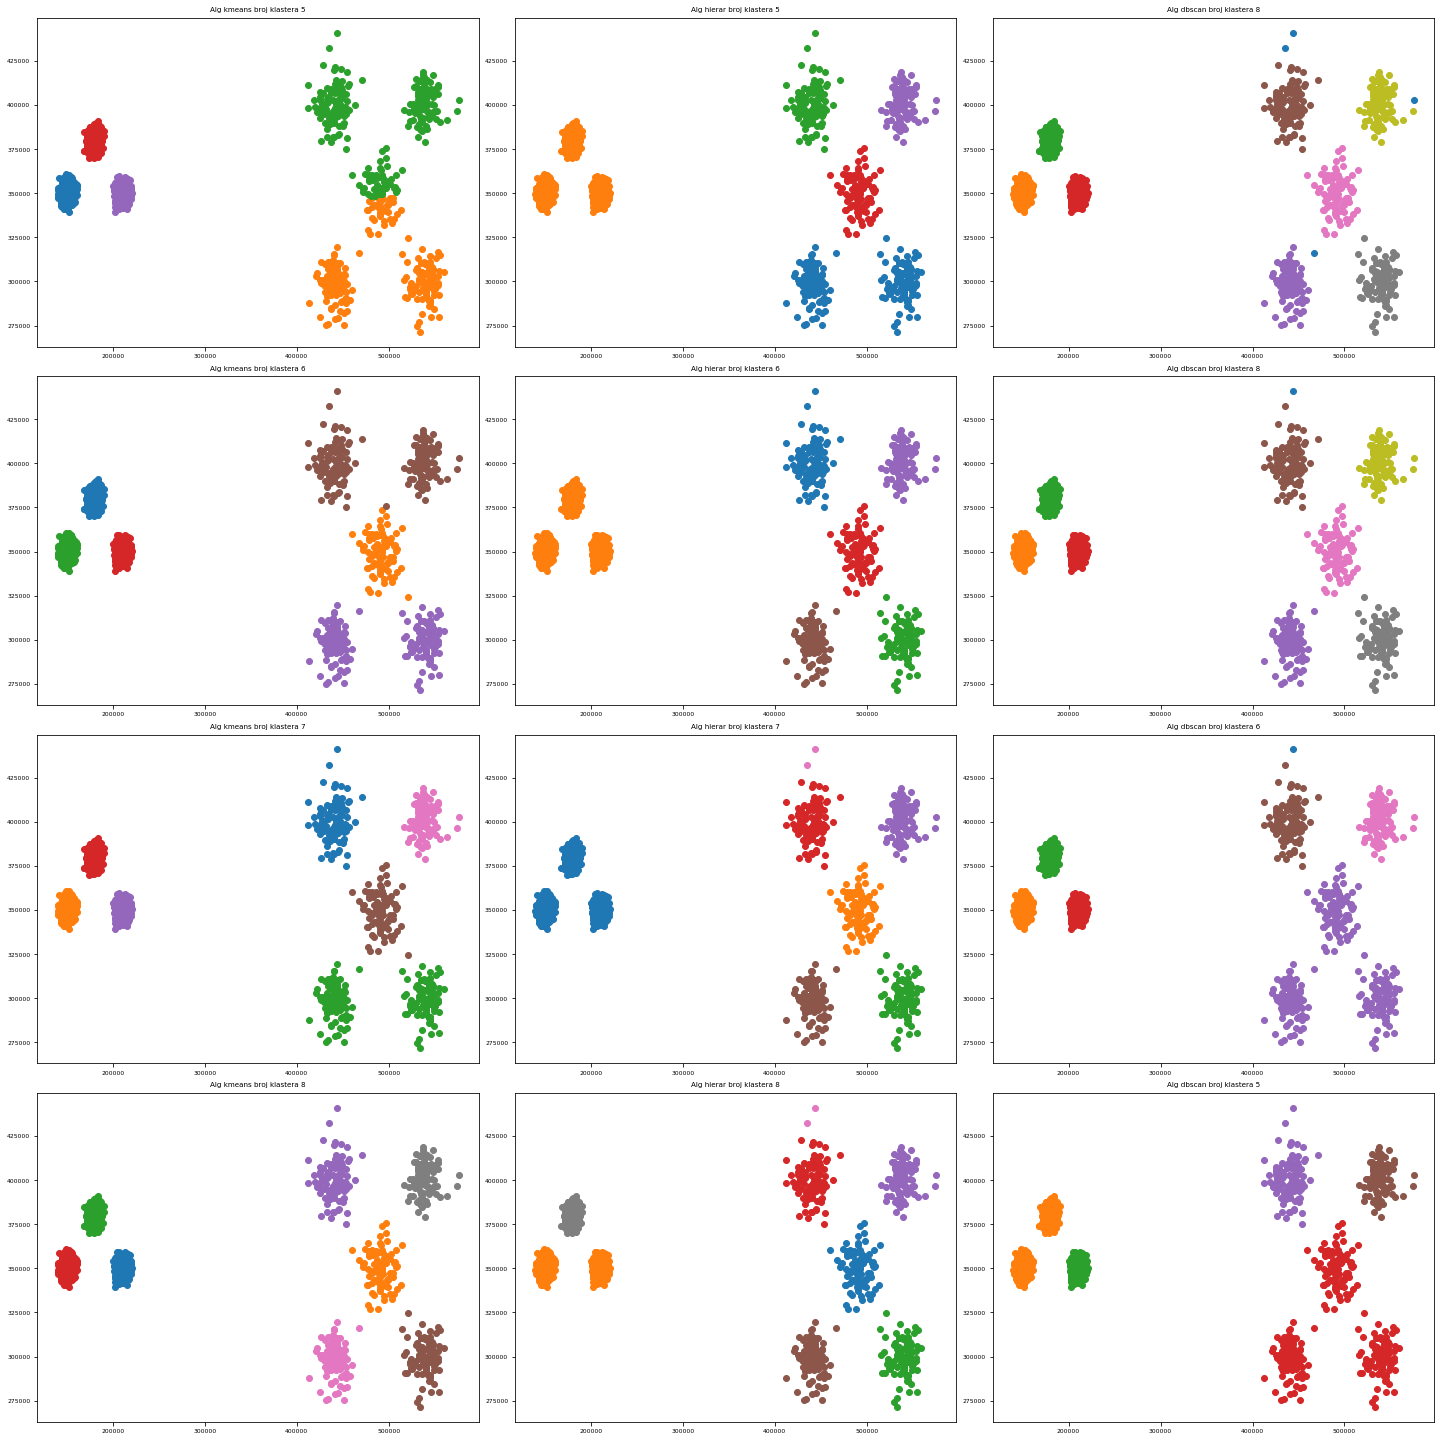

In [60]:
#kmeans parametri n_clusters = i, init = init)
#hijerarhijsko parametri n_clusters=3, linkage =link
#dbscan parametri eps, min_samples, metrics
fig = plt.figure(figsize=(20,20))
plt_ind = 1

#kmeans
for i in range (5,9):
    estimators = {
    'kmeans': KMeans(n_clusters = i),
    'hierar': AgglomerativeClustering(n_clusters = i, linkage = 'average'),
    'dbscan': DBSCAN(eps = i*0.01)
    }

    for name, est in estimators.items():
        est.fit(x)
        
        df['label'] = est.labels_
        
        fig.add_subplot(4,3,plt_ind)
        
        if name == 'dbscan':
            num_cl = max(est.labels_)+1
            min_cl = -1
            
        else:
            num_cl = i
            min_cl = 0
        
        for j in range(min_cl, num_cl):
            cluster = df.loc[lambda x : x['label']==j,:]
            plt.scatter(cluster['x'], cluster['y'])
        
        plt.title("Alg %s broj klastera %d"%(name,num_cl))
        plt_ind = plt_ind +1
        
        sc[name]['clusters'].append(num_cl)
        sc[name]['scores'].append(met.silhouette_score(x, est.labels_))
        
        
plt.tight_layout()
plt.savefig("slika.png")




[0.8248270025051663, 0.8211917702858356, 0.8267720922258726, 0.8325457409165327]
[0.7932869755607598, 0.798227106162042, 0.7968039957829304, 0.6696183708920639]
[0.8321181486112691, 0.8316291958687618, 0.8225375944654104, 0.5154616429364243]


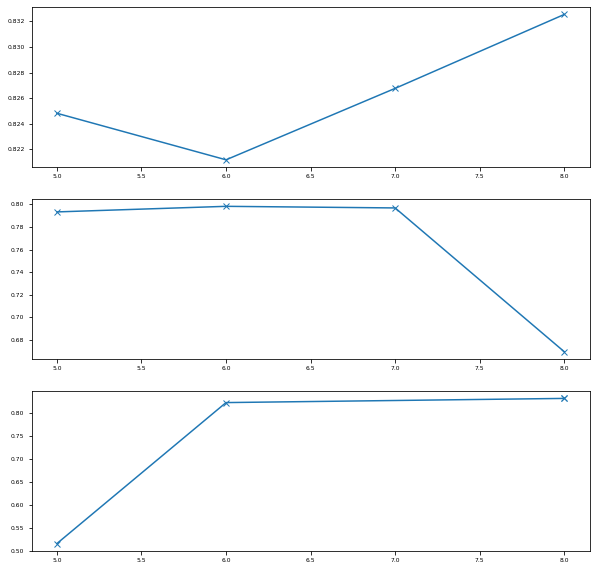

In [61]:
fig = plt.figure(figsize=(10,10))
plt_ind = 1
for name in sc:
    print(sc[name]['scores'])
    fig.add_subplot(3,1,plt_ind)
#     plt.plot(sc[name]['clusters'],sc[name]['scores'])
    plt.plot(sc[name]['clusters'],sc[name]['scores'], marker = 'x')
    plt_ind = plt_ind +1

Da li postoje nedostajuce vrednosti u skupu:  False
Deskriptivne statistike
                   x              y
count    6500.000000    6500.000000
mean   203821.333692  359235.680923
std     86874.649532   19152.058268
min    139779.000000  271530.000000
25%    152688.500000  348794.500000
50%    180888.000000  352115.500000
75%    209470.750000  378274.000000
max    575805.000000  440940.000000


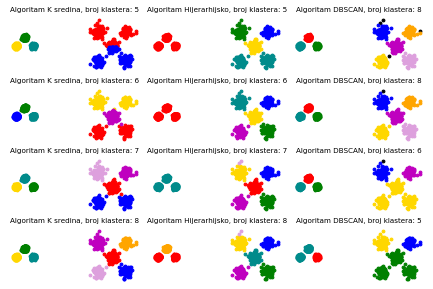

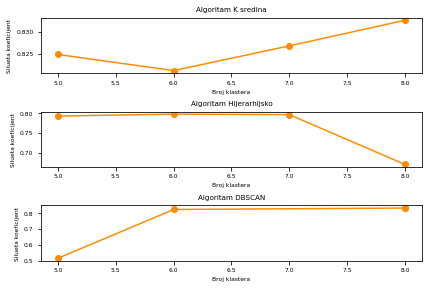

In [56]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import matplotlib

if __name__ == '__main__':

    #ucitavanje skupa
    df = pd.read_csv("unbalance.csv")

    #Provera da li postoje nedostajuce vrednosti u skupu.
    #Ukoliko postoje, potrebno ih je obraditi.
    print('Da li postoje nedostajuce vrednosti u skupu: ', df.isnull().sum().sum()!=0)

    #prikaz deskriptivnih statistika za svaki atribut radi provere opsega vrednosti po atributima
    print('Deskriptivne statistike', df.describe(), sep='\n')

    #posto se opseg vrednosti atributa x i y razlikuje, primenjuje se normalizacija atributa

    #normalizacija atributa
    x = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df))
    #dodeljivanje imena kolonama
    x.columns = df.columns

    #recnik koji ce sadrzati silueta koeficijent za razlicit broj dobijenih klastera
    #pri primeni razlicitih algoritama klasterovanja
    silhouette_scores = {'K sredina':{'clusters':[], 'score':[]},
                         'Hijerarhijsko':{'clusters':[], 'score':[]},
                         'DBSCAN':{'clusters':[], 'score':[]}}

    # Definisanje boja koje se koriste pri crtanju instanci klastera.
    # Instance jednog klastera ce biti prikazane istom bojom.
    # Kod algoritma DBSCAN sum ce biti prikazan crnom bojom.
    colors = ['darkcyan', 'red', 'green', 'gold', 'blue',  'm', 'plum', 'orange', 'black']

    #postavljanje velicine slova na slikama
    font = {'size'   : 6}
    matplotlib.rc('font', **font)

    # pravljenje slike koja ce prikazati rezultat izvrsenih klasterovanja
    # pomocu seme sa rasprsenim elementima
    fig = plt.figure()
    plt_ind=1

    #Primena tri algoritma klasterovanja sa razlicitim vrednostima za parametre (za k sredina i
    # hijerahijsko klasterovanje menja se broj zeljenih klastera (od 5 do 8), a za algoritam
    # DBSCAN rastojanje za susedne instance.
    for i in range(5, 9):
        estimators= { 'K sredina': KMeans(n_clusters=i),
                      'Hijerarhijsko': AgglomerativeClustering(n_clusters=i, linkage='average'),
                      'DBSCAN': DBSCAN(eps=i*0.01)
                      }

        #primena svakog od algoritama sa zadatim vrednostima za parametre
        for name, est in estimators.items():
            est.fit(x)

            # Originalnom skupu se dodaje jos jedan atribut 'label', koji sadrzi
            # podatak kom klasteru pripada koja instanca.
            # Oznake klastera su u intervalu [0, n_clusters-1]
            # Kod DBSCAN algoritma, instance tipa sum imaju oznaku -1.
            df['labels']= est.labels_

            # Podela slike na 4x3 celije i zadavanje
            # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
            # U jednoj celiji ce biti prikazan rezultat jednog klasterovanja.
            fig.add_subplot(4, 3, plt_ind)

            #odredjivanje broja klastera
            if name=='DBSCAN':
                num_clusters = max(est.labels_) + 1
                min=-1
            else:
                num_clusters=i
                min=0

            # obrada svakog klastera u rezultatu jednog klasterovanja
            for j in range(min,num_clusters):
                # izdvajanje instanci klastera koji se obradjuje
                cluster= df.loc[lambda x: x['labels'] == j, :]
                # crtanje instanci klastera pomocu seme sa rasprsenim elementima
                plt.scatter(cluster['x'], cluster['y'], color=colors[j], s=8, marker='o')

            #postavljanje naslova (koji sadrzi naziv primenjenog algoritma i broj izdvojenih klastera)
            # za svaku celiju
            plt.title('Algoritam %s, broj klastera: %d'%(name, num_clusters))

            #postavka da se ne prikazuju ose
            plt.axis('off')

            # prelazak u narednu celiju u kojoj ce se prikazati
            # rezultat narednog klasterovanja
            plt_ind += 1

            #cuvanje podataka o broju klastera i silueta koeficijentu za izvrseno klasterovanje
            #radi grafickog prikaza
            silhouette_scores[name]['clusters'].append(num_clusters)
            silhouette_scores[name]['score'].append(silhouette_score(x, est.labels_))

    #pravljenje slike bez poklapanja celija
    plt.tight_layout()

    #cuvanje slike
    plt.savefig('klasterovanje_nebalansiranog_skupa_instance.png')

    # Pravljenje slike koja ce prikazati rezultat izvrsenih klasterovanja
    # pomocu broja izdvojenih klastera i senka koeficijenta.

    # Za svaki primenjeni algoritam pravi se poseban grafik.
    # Rezultat za jedno izvrseno klasterovanje se prikazuje kao jedna tacka na grafiku.
    # Na x-osi se prikazuje broj izdvojenih klastera, a na y-osi izracunati senka koeficijent.

    # Za odredjivanje optimalnog broja klastera (za zadate parametre) trazi se
    # klasterovanje sa najvecim senka koeficijentom.

    fig = plt.figure()
    plt_ind=1
    #za svaki algoritam se prikazuje poseban grafik
    for name in silhouette_scores:
        # Podela slike na 3x1 celije i zadavanje
        # celije (plt_ind) u kojoj ce se izvrsiti naredna crtanja.
        # U jednoj celiji ce biti prikazani rezultati za jedan algoritam klasterovanja.
        fig.add_subplot(3, 1, plt_ind)

        #prikaz rezultata klasterovanja
        plt.plot(silhouette_scores[name]['clusters'], silhouette_scores[name]['score'],  color='darkorange', marker='o')

        # postavljanje teksta za x i y osu i naslova
        plt.xlabel('Broj klastera')
        plt.ylabel('Silueta koeficijent')
        plt.title('Algoritam %s' % name)

        # Prelazak u narednu celiju u kojoj ce biti prikazani
        # rezultati klasterovanja za sledeci algoritam
        plt_ind+=1

    #pravljenje slike bez poklapanja celija
    plt.tight_layout()
    #cuvanje slike
    plt.savefig('klasterovanje_nebalansiranog_skupa_senka_koeficijenti.png')

#Sva izvrsena klasterovanja imaju senka koeficijent iznad 0,5, cime se smatra da je izvrseno
# dobro klasterovanje.

#Na osnovu grafika sa prikazanim senka koeficijentom zakljucuje se da je za algoritma
# *K-sredina najbolje izdvojiti 8 klastera, sto potvrdjuje i slika sa prikazom instanci po klasterima.

# *hijerarhijsko klasterovanje najbolje izdvojiti 6 ili 7 klastera. Na osnovu slike sa prikazom
#  instanci po klasterima, za hijerarhijsko klasterovanje je bolje izdvojiti 6 klastera,
#  jer se kao 7. klaster izdvaja svega nekoliko instanci koje nisu dobro razdvojene od
#  drugih klastera.

# *DBSCAN najbolje izdvojiti 6 ili 8 klastera. Na osnovu slike sa prikazom
# instanci po klasterima, sa algoritmom DBSCAN je bolje izdvojiti 8 klastera.